## Import Needed Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# processing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

## Load data and take quick look

In [2]:
# load training and testing data using pandas
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
# check shape
print("Train data shape is: ", df_train.shape)
print('='*32)
print("Test data shape is: ", df_test.shape)

Train data shape is:  (891, 12)
Test data shape is:  (418, 11)


In [6]:
# check info for training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# check nulls in training data
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# check info for testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# check nulls in testing data
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

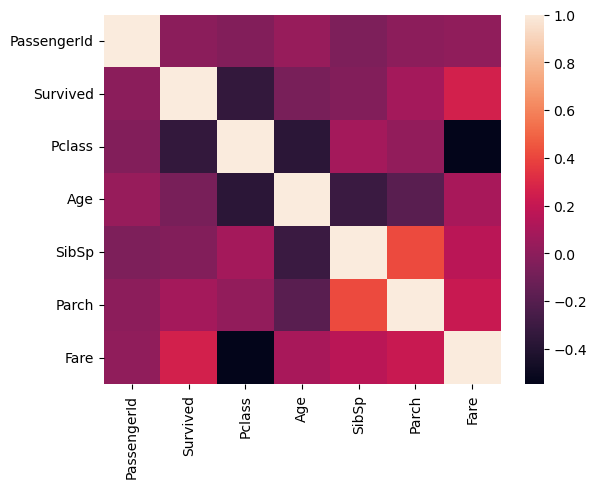

In [10]:
# create heatmap for training data
sns.heatmap(df_train.corr())
plt.show()

## Data Processing

### Handel null 'Age'

In [11]:
# extract titles from names
df_train['Title'] = df_train.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)
df_test['Title'] = df_test.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [12]:
# check titles in training data
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [13]:
# # check titles in testing data
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [14]:
# mapping titles
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,
                 "Sir": 3, "the Countess" : 3 }

df_train['Title'] = df_train['Title'].map(title_mapping)
df_test['Title'] = df_test['Title'].map(title_mapping)

In [15]:
# drop Name column for train and test 
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [16]:
df_train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [17]:
df_test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2


In [18]:
# fill missing Age with median depending on titles
df_train["Age"].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
df_test["Age"].fillna(df_test.groupby("Title")["Age"].transform("median"), inplace=True)

In [19]:
# check nulls in Age for training data
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [20]:
# check nulls in Age for testing data
df_test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

### Handel null 'Embarked'

In [21]:
# check values for 'Embarked'
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# fill nulls in 'Embarked' with 'S'
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [23]:
# check nulls in training data
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [24]:
# mapping 'Embarked'
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
df_train['New_Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['New_Embarked'] = df_test['Embarked'].map(embarked_mapping)

In [25]:
df_train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,New_Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2,1


In [26]:
df_test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,New_Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0,2
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2,0


In [27]:
# drop 'Embarked' column
df_train.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

### Handel null 'Cabin'

In [30]:
df_train.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Title             0
New_Embarked      0
dtype: int64

In [31]:
df_test.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Title             0
New_Embarked      0
dtype: int64

In [32]:
# check values for 'Cabin'
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [33]:
df_train['Cabin'] = df_train['Cabin'].str[:1]
df_test['Cabin'] = df_test['Cabin'].str[:1]

In [34]:
df_train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [35]:
df_test['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [36]:
# mapping cabin
cabin_mapping = {"C": 0, "B": 0.1, "D": 0.2, "E": 0.3, "A": 0.4, "F": 0.5, "G": 0.6, "T": 0.7}
df_train['Cabin'] = df_train['Cabin'].map(cabin_mapping)
df_test['Cabin'] = df_test['Cabin'].map(cabin_mapping)

In [37]:
# fill nulls in 'Cabin' with median depinding on 'Pclass'
df_train["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
df_test["Cabin"].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [38]:
df_train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,New_Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0.5,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,0.0,2,1


In [39]:
df_test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,New_Embarked
0,892,3,male,34.5,0,0,330911,7.8292,0.5,0,2
1,893,3,female,47.0,1,0,363272,7.0000,0.5,2,0


### Handel null 'Fare'

In [40]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Title           0
New_Embarked    0
dtype: int64

In [41]:
# fill null value with median
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

### Mapping 'Sex'

In [42]:
# mapping 'Sex'
sex_mapping = {"male": 0, "female": 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

In [43]:
# drop 'Ticket' column
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

In [44]:
df_train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,New_Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.5,0,0
1,2,1,1,1,38.0,1,0,71.2833,0.0,2,1


In [45]:
df_test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,New_Embarked
0,892,3,0,34.5,0,0,7.8292,0.5,0,2
1,893,3,1,47.0,1,0,7.0000,0.5,2,0


# Feature Selection

In [46]:
# drop 'PassengerId' column
df_train = df_train.drop(['PassengerId'], axis=1)

# X_train, X_test, target
X_train_before = df_train.drop(['Survived'], axis=1).copy()
X_test_before = df_test.drop(['PassengerId'], axis=1).copy()
target = df_train['Survived'].copy()

In [47]:
print("X_train_before shape is: ", X_train_before.shape)
print('='*28)
print("X_test_before shape is: ", X_test_before.shape)
print('='*28)
print("target shape is: ", target.shape)

X_train_before shape is:  (891, 9)
X_test_before shape is:  (418, 9)
target shape is:  (891,)


# Split data into Train and Test

In [48]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_before, target, test_size=0.2, random_state=0)

# Modeling

In [49]:
def before_split(model, model_name):
    model.fit(X_train_before, target)
    y_train_pred = model.predict(X_train_before) # train
    y_test_pred = model.predict(X_train_before) # test
    cross_scores = cross_val_score(model, X_train_before, target, cv=10)
    train_accuracy_score = accuracy_score(target, y_train_pred) # train_accuracy
    train_accuracy_f1 = f1_score(target, y_train_pred, average='weighted') # f1 train
    train_accuracy_precision = precision_score(target, y_train_pred) # precision train
    train_accuracy_recall = recall_score(target, y_train_pred) # recall train
    train_roc_auc_score = roc_auc_score(target, y_train_pred) # roc_auc train
    
    print(f"{model_name} Cross validation is: {cross_scores.mean()*100}%\n{model_name} accuracy on train is: {train_accuracy_score*100}%\n{model_name} f1 on train is is: {train_accuracy_f1*100}%\n{model_name} precision on train is: {train_accuracy_precision*100}%\n{model_name} recall on train is: {train_accuracy_recall*100}\n{model_name} roc_auc score on train is: {train_roc_auc_score*100}")

In [50]:
def train_performance(model, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train) # train
    train_accuracy_score = accuracy_score(y_train, y_train_pred) # train_accuracy
    train_accuracy_f1 = f1_score(y_train, y_train_pred, average='weighted') # f1 train
    train_accuracy_precision = precision_score(y_train, y_train_pred) # precision train
    train_accuracy_precision = precision_score(y_train, y_train_pred) # precision train
    train_accuracy_recall = recall_score(y_train, y_train_pred) # recall train
    train_roc_auc_score = roc_auc_score(y_train, y_train_pred) # roc_auc train
    print(f"{model_name} Accuracy on train is: {train_accuracy_score * 100}%\n{model_name} f1 on train is: {train_accuracy_f1 * 100}%\n{model_name} precision on train is: {train_accuracy_precision*100}%\n{model_name} recall on train is: {train_accuracy_recall*100}%\n{model_name} roc_auc score on train is: {train_roc_auc_score*100}\n")

In [51]:
def test_performance(model, model_name):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test) # test
    test_accuracy_score = accuracy_score(y_test, y_test_pred) # test_accuracy
    test_accuracy_f1 = f1_score(y_test, y_test_pred, average='weighted') # f1 test
    test_accuracy_precision = precision_score(y_test, y_test_pred) # precision test
    test_accuracy_recall = recall_score(y_test, y_test_pred) # recall test
    test_roc_auc_score = roc_auc_score(y_test, y_test_pred) # roc_auc test
    print(f"{model_name} Accuracy on test is: {test_accuracy_score * 100}%\n{model_name} f1 on test is: {test_accuracy_f1 * 100}%\n{model_name} precision on test is: {test_accuracy_precision*100}%\n{model_name} recall on test is: {test_accuracy_recall*100}%\n{model_name} roc_auc score on test is: {test_roc_auc_score*100}\n")    

In [52]:
def conf_matrix(model):
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d');

## Logistic Regression

In [53]:
Logistic = LogisticRegression(random_state=0)
before_split(Logistic, 'LogisticRegression')

LogisticRegression Cross validation is: 81.59300873907614%
LogisticRegression accuracy on train is: 81.81818181818183%
LogisticRegression f1 on train is is: 81.70698732480743%
LogisticRegression precision on train is: 77.95031055900621%
LogisticRegression recall on train is: 73.39181286549707
LogisticRegression roc_auc score on train is: 80.22960406480682


In [54]:
train_performance(Logistic, 'LogisticRegression')
test_performance(Logistic, 'LogisticRegression')

LogisticRegression Accuracy on train is: 83.00561797752809%
LogisticRegression f1 on train is: 82.9083143053361%
LogisticRegression precision on train is: 79.45736434108527%
LogisticRegression recall on train is: 75.0915750915751%
LogisticRegression roc_auc score on train is: 81.50934107653926

LogisticRegression Accuracy on test is: 78.77094972067039%
LogisticRegression f1 on test is: 78.8733851484658%
LogisticRegression precision on test is: 71.23287671232876%
LogisticRegression recall on test is: 75.36231884057972%
LogisticRegression roc_auc score on test is: 78.13570487483531



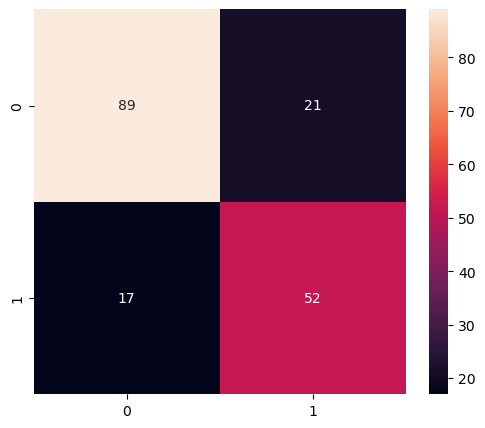

In [55]:
conf_matrix(Logistic)

## RandomForestClassifier

In [56]:
RF = RandomForestClassifier(n_estimators=100, random_state=0)
before_split(RF, 'RandomForestClassifier')

RandomForestClassifier Cross validation is: 81.37702871410737%
RandomForestClassifier accuracy on train is: 98.4287317620651%
RandomForestClassifier f1 on train is is: 98.42696205138823%
RandomForestClassifier precision on train is: 98.5207100591716%
RandomForestClassifier recall on train is: 97.36842105263158
RandomForestClassifier roc_auc score on train is: 98.22883712012272


In [57]:
train_performance(RF, 'RandomForestClassifier')
test_performance(RF, 'RandomForestClassifier')

RandomForestClassifier Accuracy on train is: 98.59550561797754%
RandomForestClassifier f1 on train is: 98.59246925506012%
RandomForestClassifier precision on train is: 99.25093632958801%
RandomForestClassifier recall on train is: 97.06959706959707%
RandomForestClassifier roc_auc score on train is: 98.30700810199671

RandomForestClassifier Accuracy on test is: 82.68156424581005%
RandomForestClassifier f1 on test is: 82.41775137253613%
RandomForestClassifier precision on test is: 81.66666666666667%
RandomForestClassifier recall on test is: 71.01449275362319%
RandomForestClassifier roc_auc score on test is: 80.5072463768116



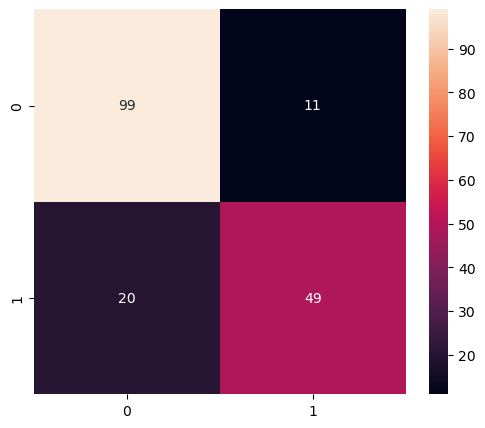

In [58]:
conf_matrix(RF)

## DecisionTreeClassifier

In [59]:
DT = DecisionTreeClassifier(random_state=0)
before_split(DT, 'DecisionTreeClassifier')

DecisionTreeClassifier Cross validation is: 77.67540574282148%
DecisionTreeClassifier accuracy on train is: 98.4287317620651%
DecisionTreeClassifier f1 on train is is: 98.42511702297485%
DecisionTreeClassifier precision on train is: 99.10179640718563%
DecisionTreeClassifier recall on train is: 96.78362573099415
DecisionTreeClassifier roc_auc score on train is: 98.11858882178123


In [60]:
train_performance(DT, 'DecisionTreeClassifier')
test_performance(DT, 'DecisionTreeClassifier')

DecisionTreeClassifier Accuracy on train is: 98.59550561797754%
DecisionTreeClassifier f1 on train is: 98.5903121803675%
DecisionTreeClassifier precision on train is: 100.0%
DecisionTreeClassifier recall on train is: 96.33699633699634%
DecisionTreeClassifier roc_auc score on train is: 98.16849816849818

DecisionTreeClassifier Accuracy on test is: 77.6536312849162%
DecisionTreeClassifier f1 on test is: 77.35809226547245%
DecisionTreeClassifier precision on test is: 73.77049180327869%
DecisionTreeClassifier recall on test is: 65.21739130434783%
DecisionTreeClassifier roc_auc score on test is: 75.33596837944663



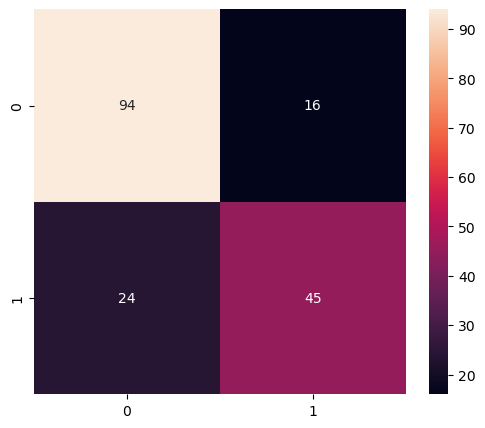

In [61]:
conf_matrix(DT)

## KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=2)
before_split(knn, 'KNeighborsClassifier')

KNeighborsClassifier Cross validation is: 71.83270911360799%
KNeighborsClassifier accuracy on train is: 84.28731762065095%
KNeighborsClassifier f1 on train is is: 83.17881327590065%
KNeighborsClassifier precision on train is: 99.50980392156863%
KNeighborsClassifier recall on train is: 59.356725146198826
KNeighborsClassifier roc_auc score on train is: 79.5872878918608


In [63]:
train_performance(knn, 'KNeighborsClassifier')
test_performance(knn, 'KNeighborsClassifier')

KNeighborsClassifier Accuracy on train is: 83.98876404494382%
KNeighborsClassifier f1 on train is: 82.79617086504771%
KNeighborsClassifier precision on train is: 100.0%
KNeighborsClassifier recall on train is: 58.24175824175825%
KNeighborsClassifier roc_auc score on train is: 79.12087912087912

KNeighborsClassifier Accuracy on test is: 69.83240223463687%
KNeighborsClassifier f1 on test is: 66.32220345589191%
KNeighborsClassifier precision on test is: 74.19354838709677%
KNeighborsClassifier recall on test is: 33.33333333333333%
KNeighborsClassifier roc_auc score on test is: 63.030303030303024



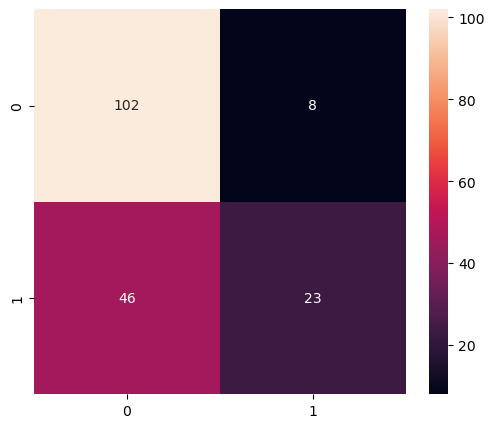

In [64]:
conf_matrix(knn)

## SVMClassifier

In [65]:
svm = SVC(random_state=0)
before_split(svm, 'SVC')

SVC Cross validation is: 68.24594257178525%
SVC accuracy on train is: 68.46240179573513%
SVC f1 on train is is: 64.82403124481274%
SVC precision on train is: 69.6774193548387%
SVC recall on train is: 31.57894736842105
SVC roc_auc score on train is: 61.508963665995594


In [66]:
train_performance(svm, 'SVC')
test_performance(svm, 'SVC')

SVC Accuracy on train is: 67.13483146067416%
SVC f1 on train is: 62.76202598314606%
SVC precision on train is: 67.56756756756756%
SVC recall on train is: 27.472527472527474%
SVC roc_auc score on train is: 59.63603594583093

SVC Accuracy on test is: 72.62569832402235%
SVC f1 on test is: 69.58211722309113%
SVC precision on test is: 81.25%
SVC recall on test is: 37.68115942028986%
SVC roc_auc score on test is: 66.1133069828722



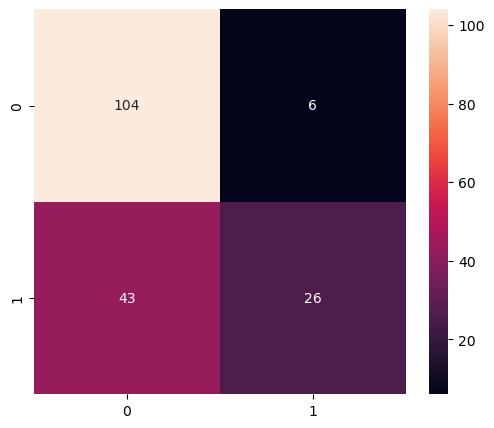

In [67]:
conf_matrix(svm)

## Gradient Boosting

In [68]:
gb = GradientBoostingClassifier(n_estimators=20, random_state=0)
before_split(gb, 'GradientBoostingClassifier')

GradientBoostingClassifier Cross validation is: 81.14606741573034%
GradientBoostingClassifier accuracy on train is: 84.17508417508418%
GradientBoostingClassifier f1 on train is is: 84.00485931075474%
GradientBoostingClassifier precision on train is: 82.52427184466019%
GradientBoostingClassifier recall on train is: 74.56140350877193
GradientBoostingClassifier roc_auc score on train is: 82.36266896750071


In [69]:
train_performance(gb, 'GradientBoostingClassifier')
test_performance(gb, 'GradientBoostingClassifier')

GradientBoostingClassifier Accuracy on train is: 85.1123595505618%
GradientBoostingClassifier f1 on train is: 85.00813398329198%
GradientBoostingClassifier precision on train is: 82.74509803921568%
GradientBoostingClassifier recall on train is: 77.2893772893773%
GradientBoostingClassifier roc_auc score on train is: 83.63329912304854

GradientBoostingClassifier Accuracy on test is: 78.2122905027933%
GradientBoostingClassifier f1 on test is: 78.24091992954959%
GradientBoostingClassifier precision on test is: 71.42857142857143%
GradientBoostingClassifier recall on test is: 72.46376811594203%
GradientBoostingClassifier roc_auc score on test is: 77.14097496706192



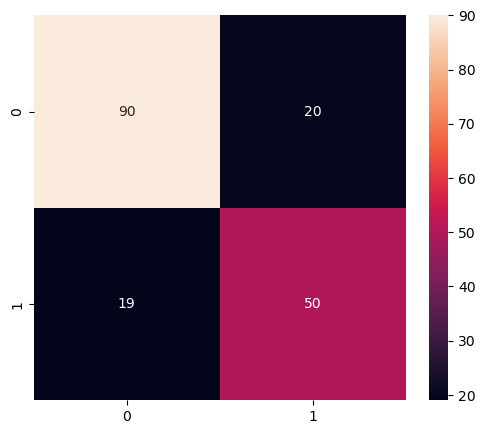

In [70]:
conf_matrix(gb)

## Bagging

In [71]:
bagg = BaggingClassifier(n_estimators=10, random_state=0)
before_split(bagg, 'BaggingClassifier')

BaggingClassifier Cross validation is: 80.58801498127342%
BaggingClassifier accuracy on train is: 96.52076318742986%
BaggingClassifier f1 on train is is: 96.49830914615649%
BaggingClassifier precision on train is: 98.4423676012461%
BaggingClassifier recall on train is: 92.39766081871345
BaggingClassifier roc_auc score on train is: 95.74345700316366


In [72]:
train_performance(bagg, 'BaggingClassifier')
test_performance(bagg, 'BaggingClassifier')

BaggingClassifier Accuracy on train is: 96.48876404494382%
BaggingClassifier f1 on train is: 96.46569225341943%
BaggingClassifier precision on train is: 98.4375%
BaggingClassifier recall on train is: 92.3076923076923%
BaggingClassifier roc_auc score on train is: 95.69826528824251

BaggingClassifier Accuracy on test is: 82.12290502793296%
BaggingClassifier f1 on test is: 81.73395345423856%
BaggingClassifier precision on test is: 82.45614035087719%
BaggingClassifier recall on test is: 68.11594202898551%
BaggingClassifier roc_auc score on test is: 79.5125164690382



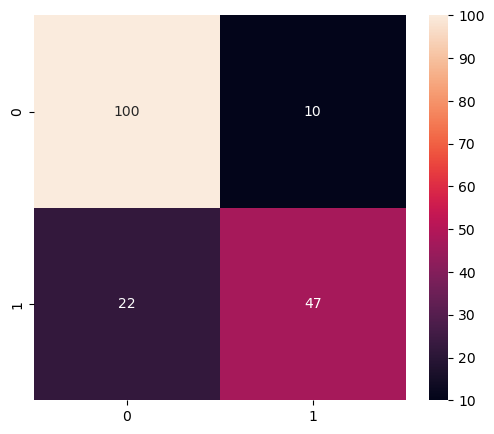

In [73]:
conf_matrix(bagg)